<a href="https://colab.research.google.com/github/mesogin/TIS2/blob/main/0306_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 아래 코드의 MNIST 데이터(패션 MNIST 데이터 아닌 실제 MNIST 데이터)를 대상으로 한 분류문제에서
# 다음 사항들을 코드로 수행해 보세요.

# 1.
# 데이터 정규화 수행
# 훈련 데이터에서 검증세트를 20% 분리
# 입력층, 뉴런(유닛) 개수 128개의 은닉층 1개(활성화 함수: relu 적용), 출력층으로 구성된 신경망 모델을 구현하되
# 모델구조를 "함수" 형태로 만드시오.
# 단, 적용할 옵티마이저는 "adam"으로 할 것.
# 또한, 은닉층 뒤에 드롭아웃(Dropout) 비율을 20%로 하는 층(layer)을 옵션으로 추가할 수 있도록 함수를 만들 것



# 데이터셋
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

# 0~1 사이의 값으로 정규화
train_scaled = train_input / 255.0
#reshape을 한 경우 flatten(input_shape=(28, 28)오 하면 오류뜸 (728,) 로 해야 배열이 맞음)
train_scaled = train_scaled.reshape(-1, 28*28)

# 훈련 데이터에서 검증세트를 20% 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
print(np.unique(train_target[:]))

[0 1 2 3 4 5 6 7 8 9]


##Flatten
앞에서 train_scale에 reshape를 한경우 Flatten을 사용할 수 없음


In [119]:
def model_fn(a_layer=None):
  model = keras.Sequential(name='sequential_')
  model.add(keras.layers.Dense(128, activation='relu', name = 'dense_1', input_shape = (784,)))
  if a_layer:
        model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='danse_2'))
  return model

In [120]:
model = model_fn(keras.layers.Dropout(0.2))

In [121]:
model.summary()

Model: "sequential_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 danse_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [122]:
#adam 옵티마이저 적용
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [123]:
# 2.
# 위에서 구현된 함수를 통해 드롭아웃 층까지 포함된 최종 모델을 훈련시키되,
# 최적의 에포크 값을 찾을 수 있도록 조기종료(early stopping) 기법을 활용하시오.
# 또한, 조기종료 기법을 통해 찾아낸 최적의 모델을 통해 검증세트에 대한 성능을 확인해 보시오.

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,   # 2번 연속 검증되지 않으면 훈련 중지
                                                  restore_best_weights=True)  # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
# history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 몇 번째 에포크에서 훈련이 중단되었는 지 표시
print(early_stopping_cb.stopped_epoch)

11


In [113]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9796


[0.072557233273983, 0.9795833230018616]

In [ ]:
## 3. 추가 문제(선택사항)
# 위에서 최종 선택된 모델을 통해 
# (원래는 이미지를 올려야 하겠지만) 검증세트의 첫 번째 이미지 픽셀값이 입력되는 상황을 가정하여
# gradio 앱을 만들어 보시오. 앱의 출력은 "업로드한 이미지의 숫자 ...입니다!"로 출력되게 구성해 보세요.
# 힌트: 모델과 관련된 predict() 메서드 활용


In [132]:
#연습문제
#테스트셋의 첫 번째 픽셀값을 출력해 보세요
print(test_input[0,])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [133]:
# 두 번째 이미지의 픽셀값을 출력해 보세요
print(test_input[1,])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [138]:
# 첫 번째 이미지의 1,2행 모든 열의 픽셀값을 출력해 보세요
print(test_input[0, 0:2,:])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


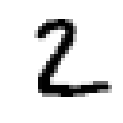

In [130]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(2,2))
axs.imshow(test_input[0*10+1], cmap='gray_r')
axs.axis('off')

plt.show()